# Homegrown vs Foreign
### Are homegrown players generally the best in their respective leagues or are they inferior to the foreign players playing in that league? Are these findings portrayed in the FIFA 18’s ratings. 

In [1]:
import os.path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
import matplotlib as mpl
%matplotlib inline 

In [2]:
RQ2 = pd.read_csv(('../../data/analysis/RQ2.csv'))
RQ2 = RQ2.drop('Unnamed: 0', 1)
RQ2 = RQ2.iloc[1:]

In [3]:
RQ2

,Players,Position,league,age,nationality,overall,Homegrown,Abroad,Starts/Apps,Subbed Off/Apps,Overall Apps,Average Form,Goals/Apps,Assists/Apps,Clean Sheets/Apps
1,Lionel Messi,Forward,Spanish Primera Division,30.0,Argentina,93.0,False,False,0.934524,0.059524,168.0,8.255952,1.065476,0.386905,0.000000
2,Cristiano Ronaldo,Forward,Spanish Primera Division,32.0,Portugal,94.0,False,False,0.975610,0.109756,164.0,7.926829,1.054878,0.317073,0.000000
3,Luis Suarez,Forward,Spanish Primera Division,30.0,Uruguay,92.0,False,False,0.975758,0.151515,165.0,7.018182,0.836364,0.363636,0.000000
4,Denis Bouanga,Midfielder,French Ligue 2,22.0,Gabon,71.0,False,False,1.000000,1.000000,1.0,7.000000,1.000000,0.000000,0.000000
5,Josh Harrop,Midfielder,English Championship,21.0,England,65.0,False,False,1.000000,0.000000,1.0,7.000000,1.000000,0.000000,0.000000
6,Dylan Saint-Louis,Midfielder,French Ligue 2,22.0,France,68.0,False,False,1.000000,1.000000,1.0,7.000000,1.000000,0.000000,0.000000
7,Luca Crosta,Goalkeeper,Italian Serie A,19.0,Italy,64.0,True,False,1.000000,0.000000,1.0,7.000000,0.000000,0.000000,0.000000
8,Zlatan Ibrahimovic,Forward,English Premier League,35.0,Sweden,88.0,False,False,0.960000,0.093333,150.0,6.900000,0.866667,0.286667,0.000000
9,Gabriel Jesus,Forward,English Premier League,20.0,Brazil,81.0,False,False,0.800000,0.300000,10.0,6.300000,0.700000,0.400000,0.000000
10,Robert Lewandowski,Forward,German Bundesliga,28.0,Poland,91.0,False,False,0.925000,0.150000,160.0,6.050000,0.756250,0.150000,0.000000


### Part 1: Who Preforms Better vs Who Is Better Rated 

In [4]:
best_preforming = RQ2.loc[RQ2['nationality'].isin(['Germany','England','Italy','Spain','France'])]
best_preforming = best_preforming.groupby(['nationality']).mean()[['Average Form']].sort_values('Average Form', ascending=False)
best_preforming

,Average Form
nationality,
France,2.174969
Germany,2.058852
Spain,2.018605
England,2.009140
Italy,1.924447


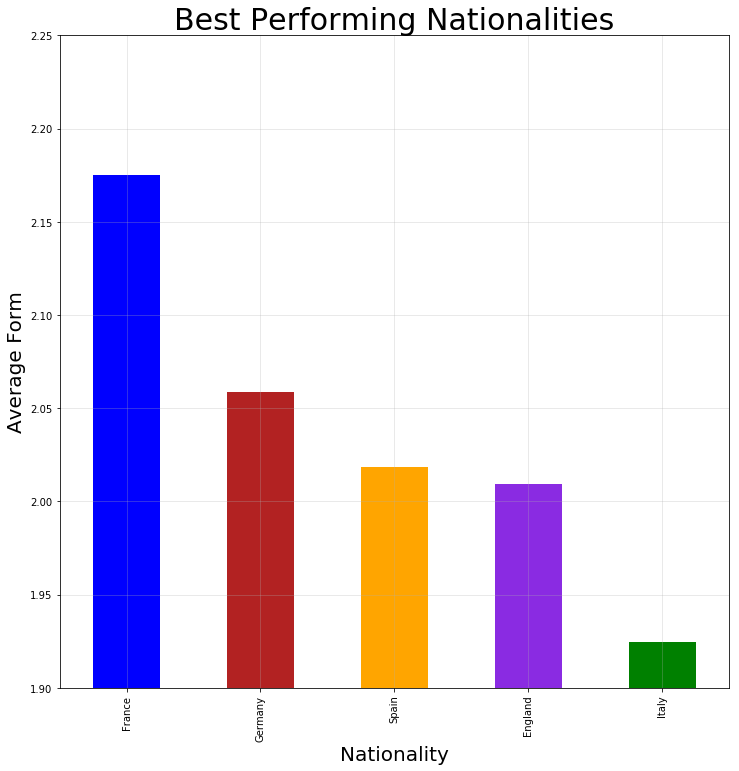

In [5]:
best_preforming.plot(figsize=(12,12),kind='bar',color=[['blue','firebrick','orange','blueviolet','green']])
axes = plt.gca()
axes.set_ylim([1.9,2.25])
axes.set_title('Best Performing Nationalities',size=30)
axes.set_xlabel('Nationality',size=20)
axes.set_ylabel('Average Form',size=20)
axes.legend_.remove()
axes.grid(True,alpha=0.35)
plt.savefig('../../data/analysis/Best Performing Nationalities.png')

In [6]:
best_rated = RQ2.loc[RQ2['nationality'].isin(['Germany','England','Italy','Spain','France'])]
best_rated = best_rated.groupby(['nationality']).mean()[['overall']].sort_values('overall', ascending=False)
best_rated

,overall
nationality,
Spain,73.885093
Germany,72.392442
France,71.953846
Italy,71.799458
England,71.448161


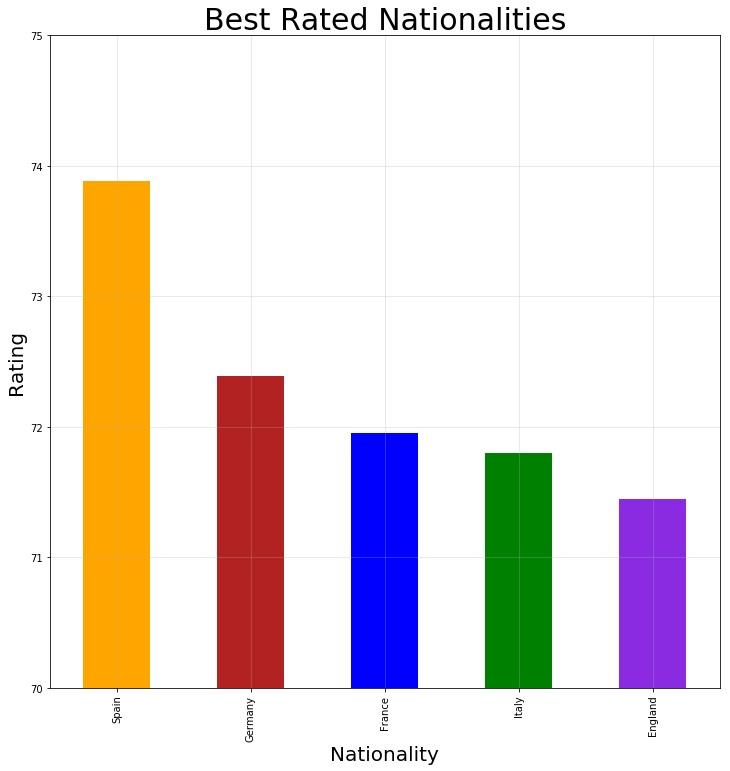

In [7]:
best_rated.plot(figsize=(12,12),kind='bar',color=[['orange','firebrick','blue','green','blueviolet']])
axes = plt.gca()
axes.set_ylim([70,75])
axes.grid(True,alpha=0.35)
axes.set_title('Best Rated Nationalities',size=30)
axes.set_ylabel('Rating',size=20)
axes.set_xlabel('Nationality',size=20)
axes.legend_.remove()
plt.savefig('../../data/analysis/Best Rated Nationalities.png')

### Lets look at the Domestic Leagues

### Player Count (What proportion of players are homegrown in each league)

In [8]:
EPL = RQ2.loc[RQ2.league=='English Premier League']
BUN = RQ2.loc[RQ2.league=='German Bundesliga']
LAL = RQ2.loc[RQ2.league=='Spanish Primera Division']
L1 = RQ2.loc[RQ2.league=='French Ligue 1']
SEI = RQ2.loc[RQ2.league=='Italian Serie A']

In [9]:
Homegrown_EPL = EPL.loc[EPL.Homegrown==True]
Foreign_EPL = EPL.loc[EPL.Homegrown==False]

Homegrown_BUN = BUN.loc[BUN.Homegrown==True]
Foreign_BUN = BUN.loc[BUN.Homegrown==False]

Homegrown_LAL = LAL.loc[LAL.Homegrown==True]
Foreign_LAL = LAL.loc[LAL.Homegrown==False]

Homegrown_L1 = L1.loc[L1.Homegrown==True]
Foreign_L1 = L1.loc[L1.Homegrown==False]

Homegrown_SEI = SEI.loc[SEI.Homegrown==True]
Foreign_SEI = SEI.loc[SEI.Homegrown==False]

In [10]:
HEPL = len(Homegrown_EPL)
HBUN = len(Homegrown_BUN)
HLAL = len(Homegrown_LAL)
FEPL = len(Foreign_EPL)
FBUN = len(Foreign_BUN)
FLAL = len(Foreign_LAL)
HL1 = len(Homegrown_L1)
HSEI = len(Homegrown_SEI)
FL1 = len(Foreign_L1)
FSEI = len(Foreign_SEI)


columns = ['Homegrown','Foreign']
count = pd.DataFrame(columns=columns)
count = count.fillna(0) # with 0s rather than NaNs
count['Homegrown']=HEPL,HBUN,HLAL,HL1,HSEI
count['Foreign']=FEPL,FBUN,FLAL,FL1,FSEI
count = count.transpose()
count.columns = ['EPL', 'BUN','LAL','L1','SEI']
count['Total'] = count.sum(axis=1)

In [11]:
mpl.rcParams['font.size'] = 15

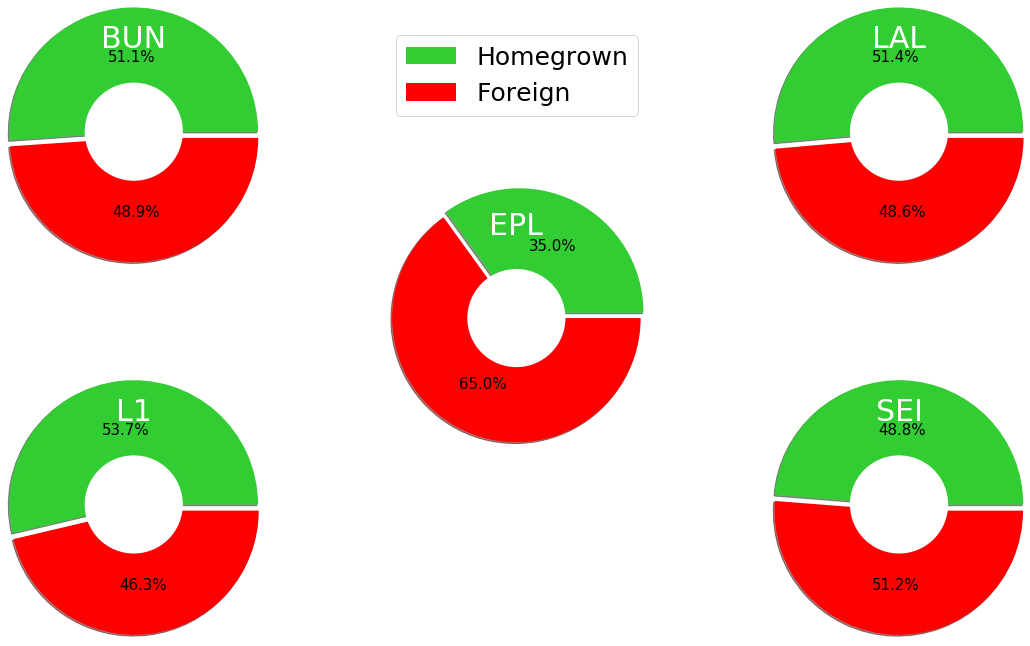

In [44]:
the_grid = GridSpec(6,6)

count.plot(figsize=(20,20))

plt.subplot(the_grid[4, 2], aspect=1)
explode2 = (0.1, 0)
plt.pie(count['EPL'],labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode2)
plt.gca().set_title('EPL',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.subplot(the_grid[3, 0], aspect=1)
explode3 = (0, 0.1)
plt.pie(count['BUN'],labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode3)
plt.gca().set_title('BUN',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[3, 4], aspect=1)
explode4 = (0, 0.1)
plt.pie(count['LAL'],labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,explode=explode4,colors=['limegreen','r'])
plt.gca().set_title('LAL',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[5, 0], aspect=1)
explode3 = (0, 0.1)
plt.pie(count['L1'],labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode3)
plt.gca().set_title('L1',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[5, 4], aspect=1)
explode4 = (0, 0.1)
plt.pie(count['SEI'],labels=['',''],labeldistance=1.2,startangle=0,autopct='%.1f%%',shadow=True, radius=2,explode=explode4,colors=['limegreen','r'])
plt.gca().set_title('SEI',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
plt.legend(bbox_to_anchor=(-2.1, 3.5, 1., .102),prop={'size':25},labels=count.index)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.savefig('../../data/analysis/Homegrown vs Foreign Leagues.png')

### % of Homegrown Players Playing Abroad

In [13]:
ENG = RQ2.loc[RQ2.nationality=='England']
GER = RQ2.loc[RQ2.nationality=='Germany']
SPA = RQ2.loc[RQ2.nationality=='Spain']
FRA = RQ2.loc[RQ2.nationality=='France']
ITA = RQ2.loc[RQ2.nationality=='Italy']

In [14]:
Abroad_ENG = ENG.loc[ENG.Abroad==True]
Home_ENG = ENG.loc[ENG.Abroad==False]

Abroad_GER = GER.loc[GER.Abroad==True]
Home_GER = GER.loc[GER.Abroad==False]

Abroad_SPA = SPA.loc[SPA.Abroad==True]
Home_SPA = SPA.loc[SPA.Abroad==False]

Abroad_FRA = FRA.loc[FRA.Abroad==True]
Home_FRA = FRA.loc[FRA.Abroad==False]

Abroad_ITA = ITA.loc[ITA.Abroad==True]
Home_ITA = ITA.loc[ITA.Abroad==False]

In [15]:
AENG = len(Abroad_ENG)
AGER = len(Abroad_GER)
AFRA = len(Abroad_FRA)
HENG = len(Home_ENG)
HGER = len(Home_GER)
HFRA = len(Home_FRA)
ASPA = len(Abroad_SPA)
AITA = len(Abroad_ITA)
HSPA = len(Home_SPA)
HITA = len(Home_ITA)


columns = ['Abroad','Home']
count1 = pd.DataFrame(columns=columns)
count1 = count1.fillna(0) # with 0s rather than NaNs
count1['Abroad']=AENG,AGER,ASPA,AFRA,AITA
count1['Home']=HENG,HGER,HSPA,HFRA,HITA
count1 = count1.transpose()
count1.columns = ['ENG', 'GER','SPA','FRA','ITA']
count1['Total'] = count1.sum(axis=1)

In [16]:
count1

,ENG,GER,SPA,FRA,ITA,Total
Abroad,1,21,40,75,19,156
Home,298,323,282,380,350,1633


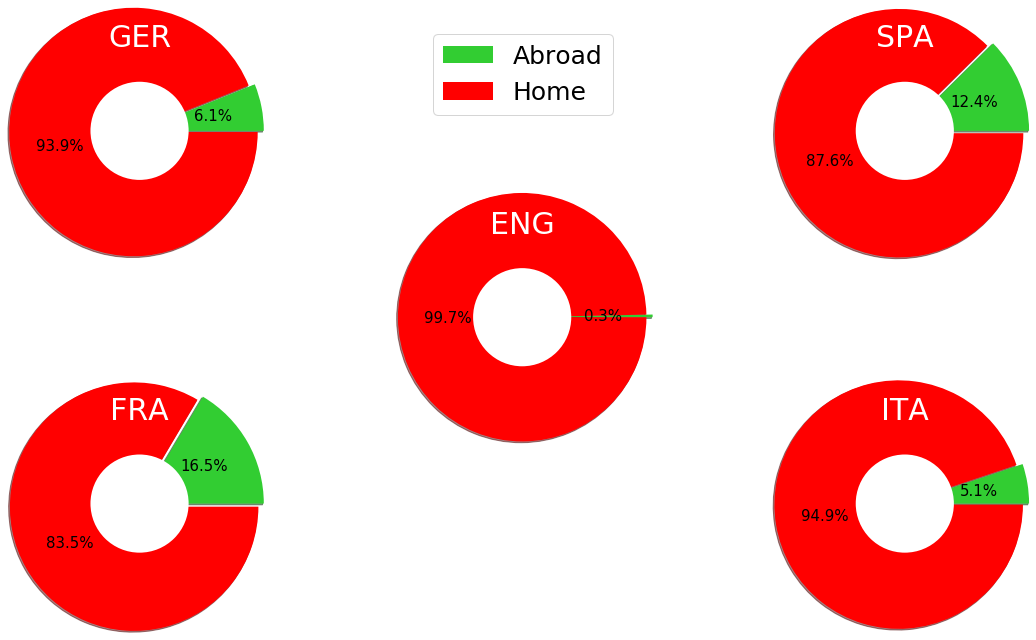

In [17]:
the_grid = GridSpec(6,6)

count1.plot(figsize=(20,20))

plt.subplot(the_grid[4, 2], aspect=1)
explode2 = (0.1, 0)
plt.pie(count1['ENG'],labels=['',''],labeldistance=1.3,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode2)
plt.gca().set_title('ENG',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.subplot(the_grid[3, 0], aspect=1)
explode3 = (0, 0.1)
plt.pie(count1['GER'],labels=['',''],labeldistance=1.3,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode3)
plt.gca().set_title('GER',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[3, 4], aspect=1)
explode4 = (0, 0.1)
plt.pie(count1['SPA'],labels=['',''],labeldistance=1.3,startangle=0,autopct='%.1f%%',shadow=True, radius=2,explode=explode4,colors=['limegreen','r'])
plt.gca().set_title('SPA',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[5, 0], aspect=1)
explode3 = (0, 0.1)
plt.pie(count1['FRA'],labels=['',''],labeldistance=1.3,startangle=0,autopct='%.1f%%',shadow=True, radius=2,colors=['limegreen','r'],explode=explode3)
plt.gca().set_title('FRA',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(the_grid[5, 4], aspect=1)
explode4 = (0, 0.1)
plt.pie(count1['ITA'],labels=['',''],labeldistance=1.3,startangle=0,autopct='%.1f%%',shadow=True, radius=2,explode=explode4,colors=['limegreen','r'])
plt.gca().set_title('ITA',color='white',fontsize=30)
centre_circle = plt.Circle((0,0),0.79,fc='white')
plt.legend(bbox_to_anchor=(-2.3, 3.5, 1., .102),prop={'size':25},labels=count1.index)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.savefig('../../data/analysis/Abroad vs Home Nations.png')

### Breakdown of Positions

In [18]:
EPL_H_GK = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Goalkeeper','Average Form'].mean()
EPL_F_GK = Foreign_EPL.loc[Foreign_EPL['Position']=='Goalkeeper','Average Form'].mean()

EPL_H_DEF = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Defender','Average Form'].mean()
EPL_F_DEF = Foreign_EPL.loc[Foreign_EPL['Position']=='Defender','Average Form'].mean()

EPL_H_MID = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Midfielder','Average Form'].mean()
EPL_F_MID = Foreign_EPL.loc[Foreign_EPL['Position']=='Midfielder','Average Form'].mean()

EPL_H_FWD = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Forward','Average Form'].mean()
EPL_F_FWD = Foreign_EPL.loc[Foreign_EPL['Position']=='Forward','Average Form'].mean()

EPL_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
EPL_positions.set_value(0,'Position',"Goalkeeper")
EPL_positions.set_value(0,'Homegrown',EPL_H_GK)
EPL_positions.set_value(0,'Foreign',EPL_F_GK)
EPL_positions.set_value(1,'Position',"Defender")
EPL_positions.set_value(1,'Homegrown',EPL_H_DEF)
EPL_positions.set_value(1,'Foreign',EPL_F_DEF)
EPL_positions.set_value(2,'Position',"Midfielder")
EPL_positions.set_value(2,'Homegrown',EPL_H_MID)
EPL_positions.set_value(2,'Foreign',EPL_F_MID)
EPL_positions.set_value(3,'Position',"Forward")
EPL_positions.set_value(3,'Homegrown',EPL_H_FWD)
EPL_positions.set_value(3,'Foreign',EPL_F_FWD)

EPL_positions =EPL_positions.transpose()
EPL_positions.columns =EPL_positions.iloc[0]
EPL_positions =EPL_positions.drop(EPL_positions.index[0])
EPL_positions =EPL_positions.transpose()



EPL_H_GK = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Goalkeeper','overall'].mean()
EPL_F_GK = Foreign_EPL.loc[Foreign_EPL['Position']=='Goalkeeper','overall'].mean()

EPL_H_DEF = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Defender','overall'].mean()
EPL_F_DEF = Foreign_EPL.loc[Foreign_EPL['Position']=='Defender','overall'].mean()

EPL_H_MID = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Midfielder','overall'].mean()
EPL_F_MID = Foreign_EPL.loc[Foreign_EPL['Position']=='Midfielder','overall'].mean()

EPL_H_FWD = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Forward','overall'].mean()
EPL_F_FWD = Foreign_EPL.loc[Foreign_EPL['Position']=='Forward','overall'].mean()

EPL_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
EPL_overall.set_value(0,'Position',"Goalkeeper")
EPL_overall.set_value(0,'Homegrown',EPL_H_GK)
EPL_overall.set_value(0,'Foreign',EPL_F_GK)
EPL_overall.set_value(1,'Position',"Defender")
EPL_overall.set_value(1,'Homegrown',EPL_H_DEF)
EPL_overall.set_value(1,'Foreign',EPL_F_DEF)
EPL_overall.set_value(2,'Position',"Midfielder")
EPL_overall.set_value(2,'Homegrown',EPL_H_MID)
EPL_overall.set_value(2,'Foreign',EPL_F_MID)
EPL_overall.set_value(3,'Position',"Forward")
EPL_overall.set_value(3,'Homegrown',EPL_H_FWD)
EPL_overall.set_value(3,'Foreign',EPL_F_FWD)

EPL_overall =EPL_overall.transpose()
EPL_overall.columns =EPL_overall.iloc[0]
EPL_overall =EPL_overall.drop(EPL_overall.index[0])
EPL_overall =EPL_overall.transpose()

In [19]:
LAL_H_GK = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Goalkeeper','Average Form'].mean()
LAL_F_GK = Foreign_LAL.loc[Foreign_LAL['Position']=='Goalkeeper','Average Form'].mean()

LAL_H_DEF = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Defender','Average Form'].mean()
LAL_F_DEF = Foreign_LAL.loc[Foreign_LAL['Position']=='Defender','Average Form'].mean()

LAL_H_MID = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Midfielder','Average Form'].mean()
LAL_F_MID = Foreign_LAL.loc[Foreign_LAL['Position']=='Midfielder','Average Form'].mean()

LAL_H_FWD = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Forward','Average Form'].mean()
LAL_F_FWD = Foreign_LAL.loc[Foreign_LAL['Position']=='Forward','Average Form'].mean()

LAL_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
LAL_positions.set_value(0,'Position',"Goalkeeper")
LAL_positions.set_value(0,'Homegrown',LAL_H_GK)
LAL_positions.set_value(0,'Foreign',LAL_F_GK)
LAL_positions.set_value(1,'Position',"Defender")
LAL_positions.set_value(1,'Homegrown',LAL_H_DEF)
LAL_positions.set_value(1,'Foreign',LAL_F_DEF)
LAL_positions.set_value(2,'Position',"Midfielder")
LAL_positions.set_value(2,'Homegrown',LAL_H_MID)
LAL_positions.set_value(2,'Foreign',LAL_F_MID)
LAL_positions.set_value(3,'Position',"Forward")
LAL_positions.set_value(3,'Homegrown',LAL_H_FWD)
LAL_positions.set_value(3,'Foreign',LAL_F_FWD)

LAL_positions =LAL_positions.transpose()
LAL_positions.columns =LAL_positions.iloc[0]
LAL_positions =LAL_positions.drop(LAL_positions.index[0])
LAL_positions =LAL_positions.transpose()
LAL_positions



LAL_H_GK = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Goalkeeper','overall'].mean()
LAL_F_GK = Foreign_LAL.loc[Foreign_LAL['Position']=='Goalkeeper','overall'].mean()

LAL_H_DEF = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Defender','overall'].mean()
LAL_F_DEF = Foreign_LAL.loc[Foreign_LAL['Position']=='Defender','overall'].mean()

LAL_H_MID = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Midfielder','overall'].mean()
LAL_F_MID = Foreign_LAL.loc[Foreign_LAL['Position']=='Midfielder','overall'].mean()

LAL_H_FWD = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Forward','overall'].mean()
LAL_F_FWD = Foreign_LAL.loc[Foreign_LAL['Position']=='Forward','overall'].mean()

LAL_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
LAL_overall.set_value(0,'Position',"Goalkeeper")
LAL_overall.set_value(0,'Homegrown',LAL_H_GK)
LAL_overall.set_value(0,'Foreign',LAL_F_GK)
LAL_overall.set_value(1,'Position',"Defender")
LAL_overall.set_value(1,'Homegrown',LAL_H_DEF)
LAL_overall.set_value(1,'Foreign',LAL_F_DEF)
LAL_overall.set_value(2,'Position',"Midfielder")
LAL_overall.set_value(2,'Homegrown',LAL_H_MID)
LAL_overall.set_value(2,'Foreign',LAL_F_MID)
LAL_overall.set_value(3,'Position',"Forward")
LAL_overall.set_value(3,'Homegrown',LAL_H_FWD)
LAL_overall.set_value(3,'Foreign',LAL_F_FWD)

LAL_overall =LAL_overall.transpose()
LAL_overall.columns =LAL_overall.iloc[0]
LAL_overall =LAL_overall.drop(LAL_overall.index[0])
LAL_overall =LAL_overall.transpose()

In [20]:
BUN_H_GK = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Goalkeeper','Average Form'].mean()
BUN_F_GK = Foreign_BUN.loc[Foreign_BUN['Position']=='Goalkeeper','Average Form'].mean()

BUN_H_DEF = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Defender','Average Form'].mean()
BUN_F_DEF = Foreign_BUN.loc[Foreign_BUN['Position']=='Defender','Average Form'].mean()

BUN_H_MID = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Midfielder','Average Form'].mean()
BUN_F_MID = Foreign_BUN.loc[Foreign_BUN['Position']=='Midfielder','Average Form'].mean()

BUN_H_FWD = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Forward','Average Form'].mean()
BUN_F_FWD = Foreign_BUN.loc[Foreign_BUN['Position']=='Forward','Average Form'].mean()

BUN_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
BUN_positions.set_value(0,'Position',"Goalkeeper")
BUN_positions.set_value(0,'Homegrown',BUN_H_GK)
BUN_positions.set_value(0,'Foreign',BUN_F_GK)
BUN_positions.set_value(1,'Position',"Defender")
BUN_positions.set_value(1,'Homegrown',BUN_H_DEF)
BUN_positions.set_value(1,'Foreign',BUN_F_DEF)
BUN_positions.set_value(2,'Position',"Midfielder")
BUN_positions.set_value(2,'Homegrown',BUN_H_MID)
BUN_positions.set_value(2,'Foreign',BUN_F_MID)
BUN_positions.set_value(3,'Position',"Forward")
BUN_positions.set_value(3,'Homegrown',BUN_H_FWD)
BUN_positions.set_value(3,'Foreign',BUN_F_FWD)


BUN_positions =BUN_positions.transpose()
BUN_positions.columns =BUN_positions.iloc[0]
BUN_positions =BUN_positions.drop(BUN_positions.index[0])
BUN_positions =BUN_positions.transpose()
BUN_positions = BUN_positions.reset_index()
BUN_positions


BUN_H_GK = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Goalkeeper','overall'].mean()
BUN_F_GK = Foreign_BUN.loc[Foreign_BUN['Position']=='Goalkeeper','overall'].mean()

BUN_H_DEF = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Defender','overall'].mean()
BUN_F_DEF = Foreign_BUN.loc[Foreign_BUN['Position']=='Defender','overall'].mean()

BUN_H_MID = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Midfielder','overall'].mean()
BUN_F_MID = Foreign_BUN.loc[Foreign_BUN['Position']=='Midfielder','overall'].mean()

BUN_H_FWD = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Forward','overall'].mean()
BUN_F_FWD = Foreign_BUN.loc[Foreign_BUN['Position']=='Forward','overall'].mean()

BUN_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
BUN_overall.set_value(0,'Position',"Goalkeeper")
BUN_overall.set_value(0,'Homegrown',BUN_H_GK)
BUN_overall.set_value(0,'Foreign',BUN_F_GK)
BUN_overall.set_value(1,'Position',"Defender")
BUN_overall.set_value(1,'Homegrown',BUN_H_DEF)
BUN_overall.set_value(1,'Foreign',BUN_F_DEF)
BUN_overall.set_value(2,'Position',"Midfielder")
BUN_overall.set_value(2,'Homegrown',BUN_H_MID)
BUN_overall.set_value(2,'Foreign',BUN_F_MID)
BUN_overall.set_value(3,'Position',"Forward")
BUN_overall.set_value(3,'Homegrown',BUN_H_FWD)
BUN_overall.set_value(3,'Foreign',BUN_F_FWD)

BUN_overall =BUN_overall.transpose()
BUN_overall.columns =BUN_overall.iloc[0]
BUN_overall =BUN_overall.drop(BUN_overall.index[0])
BUN_overall =BUN_overall.transpose()

In [21]:
L1_H_GK = Homegrown_L1.loc[Homegrown_L1['Position']=='Goalkeeper','Average Form'].mean()
L1_F_GK = Foreign_L1.loc[Foreign_L1['Position']=='Goalkeeper','Average Form'].mean()

L1_H_DEF = Homegrown_L1.loc[Homegrown_L1['Position']=='Defender','Average Form'].mean()
L1_F_DEF = Foreign_L1.loc[Foreign_L1['Position']=='Defender','Average Form'].mean()

L1_H_MID = Homegrown_L1.loc[Homegrown_L1['Position']=='Midfielder','Average Form'].mean()
L1_F_MID = Foreign_L1.loc[Foreign_L1['Position']=='Midfielder','Average Form'].mean()

L1_H_FWD = Homegrown_L1.loc[Homegrown_L1['Position']=='Forward','Average Form'].mean()
L1_F_FWD = Foreign_L1.loc[Foreign_L1['Position']=='Forward','Average Form'].mean()

L1_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
L1_positions.set_value(0,'Position',"Goalkeeper")
L1_positions.set_value(0,'Homegrown',L1_H_GK)
L1_positions.set_value(0,'Foreign',L1_F_GK)
L1_positions.set_value(1,'Position',"Defender")
L1_positions.set_value(1,'Homegrown',L1_H_DEF)
L1_positions.set_value(1,'Foreign',L1_F_DEF)
L1_positions.set_value(2,'Position',"Midfielder")
L1_positions.set_value(2,'Homegrown',L1_H_MID)
L1_positions.set_value(2,'Foreign',L1_F_MID)
L1_positions.set_value(3,'Position',"Forward")
L1_positions.set_value(3,'Homegrown',L1_H_FWD)
L1_positions.set_value(3,'Foreign',L1_F_FWD)

L1_positions =L1_positions.transpose()
L1_positions.columns =L1_positions.iloc[0]
L1_positions =L1_positions.drop(L1_positions.index[0])
L1_positions =L1_positions.transpose()
L1_positions = L1_positions.reset_index()
L1_positions


L1_H_GK = Homegrown_L1.loc[Homegrown_L1['Position']=='Goalkeeper','overall'].mean()
L1_F_GK = Foreign_L1.loc[Foreign_L1['Position']=='Goalkeeper','overall'].mean()

L1_H_DEF = Homegrown_L1.loc[Homegrown_L1['Position']=='Defender','overall'].mean()
L1_F_DEF = Foreign_L1.loc[Foreign_L1['Position']=='Defender','overall'].mean()

L1_H_MID = Homegrown_L1.loc[Homegrown_L1['Position']=='Midfielder','overall'].mean()
L1_F_MID = Foreign_L1.loc[Foreign_L1['Position']=='Midfielder','overall'].mean()

L1_H_FWD = Homegrown_L1.loc[Homegrown_L1['Position']=='Forward','overall'].mean()
L1_F_FWD = Foreign_L1.loc[Foreign_L1['Position']=='Forward','overall'].mean()

L1_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
L1_overall.set_value(0,'Position',"Goalkeeper")
L1_overall.set_value(0,'Homegrown',L1_H_GK)
L1_overall.set_value(0,'Foreign',L1_F_GK)
L1_overall.set_value(1,'Position',"Defender")
L1_overall.set_value(1,'Homegrown',L1_H_DEF)
L1_overall.set_value(1,'Foreign',L1_F_DEF)
L1_overall.set_value(2,'Position',"Midfielder")
L1_overall.set_value(2,'Homegrown',L1_H_MID)
L1_overall.set_value(2,'Foreign',L1_F_MID)
L1_overall.set_value(3,'Position',"Forward")
L1_overall.set_value(3,'Homegrown',L1_H_FWD)
L1_overall.set_value(3,'Foreign',L1_F_FWD)

L1_overall =L1_overall.transpose()
L1_overall.columns =L1_overall.iloc[0]
L1_overall =L1_overall.drop(L1_overall.index[0])
L1_overall =L1_overall.transpose()

In [22]:
ENG_abroad = RQ2.loc[(RQ2.nationality=='England') & (RQ2.league!='English Premier League')]
GER_abroad = RQ2.loc[(RQ2.nationality=='Germany') & (RQ2.league!='German Bundesliga')]
SPA_abroad = RQ2.loc[(RQ2.nationality=='Spain') & (RQ2.league!='Spanish Primera Division')]
FR_abroad = RQ2.loc[(RQ2.nationality=='France') & (RQ2.league!='French Ligue 1')]
ITA_abroad = RQ2.loc[(RQ2.nationality=='Italy') & (RQ2.league!='Italian Serie A')]

In [23]:
ENG_abroad['league'].unique()

array(['English Championship', 'USA Major League Soccer',
       'English League Two', 'English League One', 'Japanese J1 League',
       'Mexican Liga MX', 'Spanish Segunda Division',
       'Scottish Premiership', 'German Bundesliga'], dtype=object)

In [24]:
SEI_H_GK = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Goalkeeper','Average Form'].mean()
SEI_F_GK = Foreign_SEI.loc[Foreign_SEI['Position']=='Goalkeeper','Average Form'].mean()

SEI_H_DEF = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Defender','Average Form'].mean()
SEI_F_DEF = Foreign_SEI.loc[Foreign_SEI['Position']=='Defender','Average Form'].mean()

SEI_H_MID = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Midfielder','Average Form'].mean()
SEI_F_MID = Foreign_SEI.loc[Foreign_SEI['Position']=='Midfielder','Average Form'].mean()

SEI_H_FWD = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Forward','Average Form'].mean()
SEI_F_FWD = Foreign_SEI.loc[Foreign_SEI['Position']=='Forward','Average Form'].mean()

SEI_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
SEI_positions.set_value(0,'Position',"Goalkeeper")
SEI_positions.set_value(0,'Homegrown',SEI_H_GK)
SEI_positions.set_value(0,'Foreign',SEI_F_GK)
SEI_positions.set_value(1,'Position',"Defender")
SEI_positions.set_value(1,'Homegrown',SEI_H_DEF)
SEI_positions.set_value(1,'Foreign',SEI_F_DEF)
SEI_positions.set_value(2,'Position',"Midfielder")
SEI_positions.set_value(2,'Homegrown',SEI_H_MID)
SEI_positions.set_value(2,'Foreign',SEI_F_MID)
SEI_positions.set_value(3,'Position',"Forward")
SEI_positions.set_value(3,'Homegrown',SEI_H_FWD)
SEI_positions.set_value(3,'Foreign',SEI_F_FWD)

SEI_positions =SEI_positions.transpose()
SEI_positions.columns =SEI_positions.iloc[0]
SEI_positions =SEI_positions.drop(SEI_positions.index[0])
SEI_positions =SEI_positions.transpose()



SEI_H_GK = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Goalkeeper','overall'].mean()
SEI_F_GK = Foreign_SEI.loc[Foreign_SEI['Position']=='Goalkeeper','overall'].mean()

SEI_H_DEF = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Defender','overall'].mean()
SEI_F_DEF = Foreign_SEI.loc[Foreign_SEI['Position']=='Defender','overall'].mean()

SEI_H_MID = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Midfielder','overall'].mean()
SEI_F_MID = Foreign_SEI.loc[Foreign_SEI['Position']=='Midfielder','overall'].mean()

SEI_H_FWD = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Forward','overall'].mean()
SEI_F_FWD = Foreign_SEI.loc[Foreign_SEI['Position']=='Forward','overall'].mean()

SEI_overall = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
SEI_overall.set_value(0,'Position',"Goalkeeper")
SEI_overall.set_value(0,'Homegrown',SEI_H_GK)
SEI_overall.set_value(0,'Foreign',SEI_F_GK)
SEI_overall.set_value(1,'Position',"Defender")
SEI_overall.set_value(1,'Homegrown',SEI_H_DEF)
SEI_overall.set_value(1,'Foreign',SEI_F_DEF)
SEI_overall.set_value(2,'Position',"Midfielder")
SEI_overall.set_value(2,'Homegrown',SEI_H_MID)
SEI_overall.set_value(2,'Foreign',SEI_F_MID)
SEI_overall.set_value(3,'Position',"Forward")
SEI_overall.set_value(3,'Homegrown',SEI_H_FWD)
SEI_overall.set_value(3,'Foreign',SEI_F_FWD)

SEI_overall =SEI_overall.transpose()
SEI_overall.columns =SEI_overall.iloc[0]
SEI_overall =SEI_overall.drop(SEI_overall.index[0])
SEI_overall =SEI_overall.transpose()

In [25]:
EPL_positions

,Homegrown,Foreign
Position,,
Goalkeeper,2.41836,2.50348
Defender,2.28067,2.40502
Midfielder,2.11424,2.38824
Forward,2.90056,3.12641


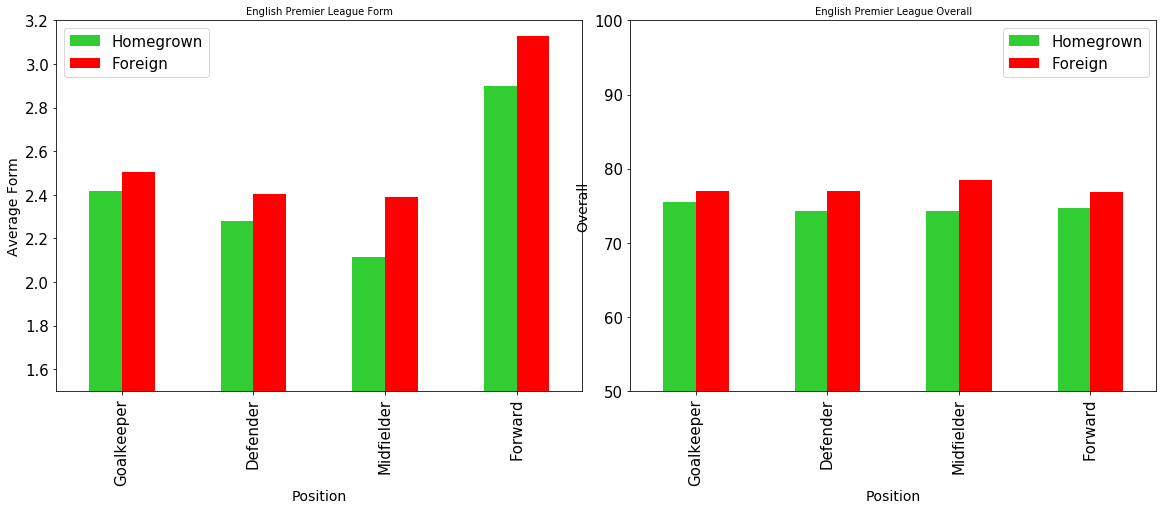

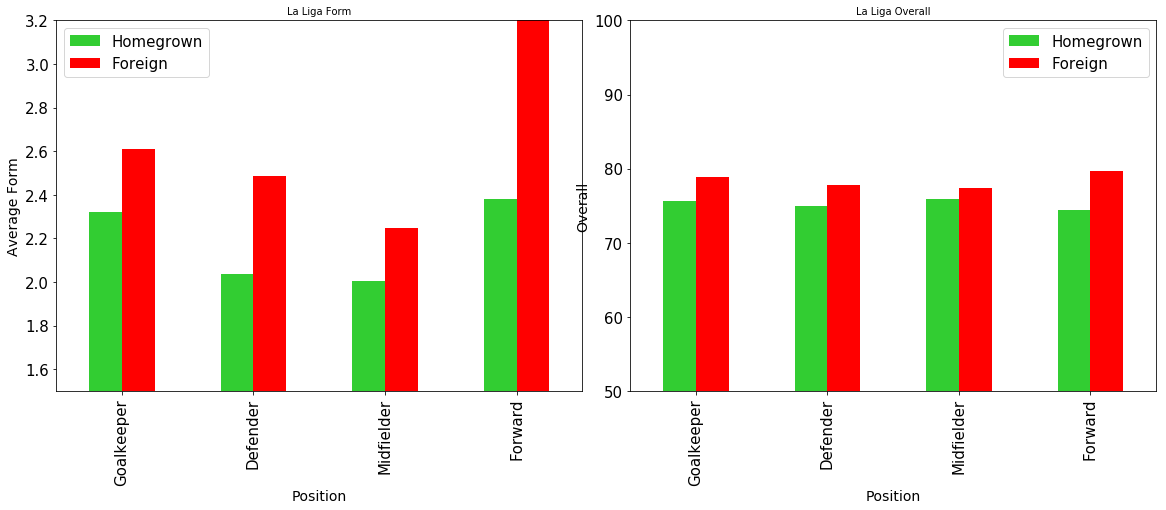

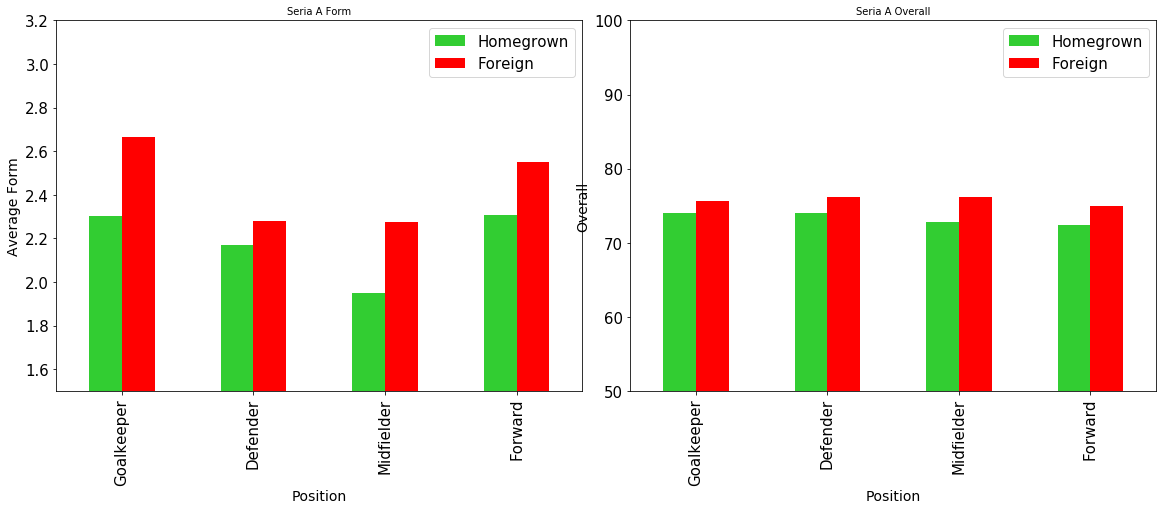

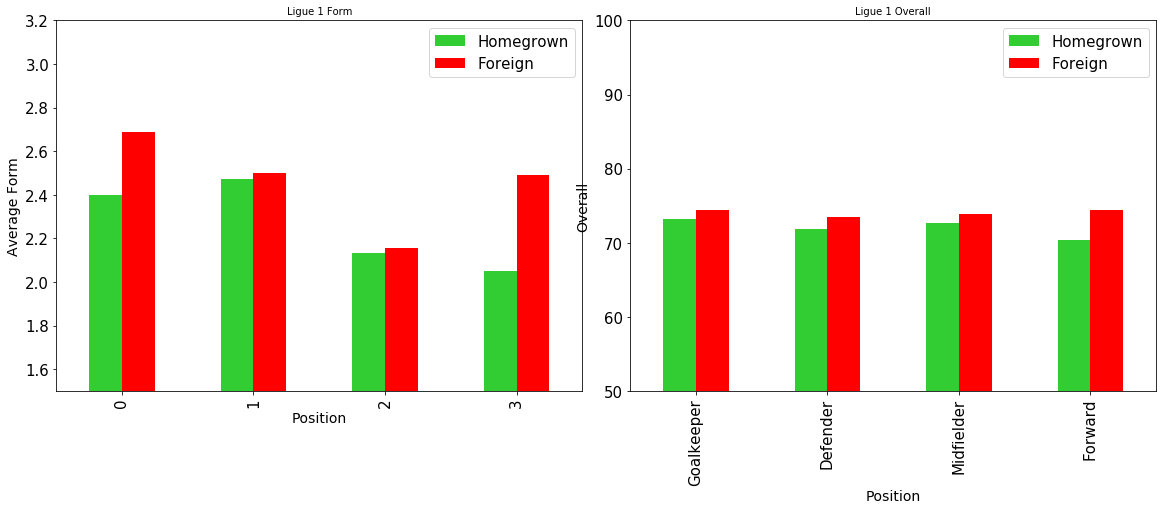

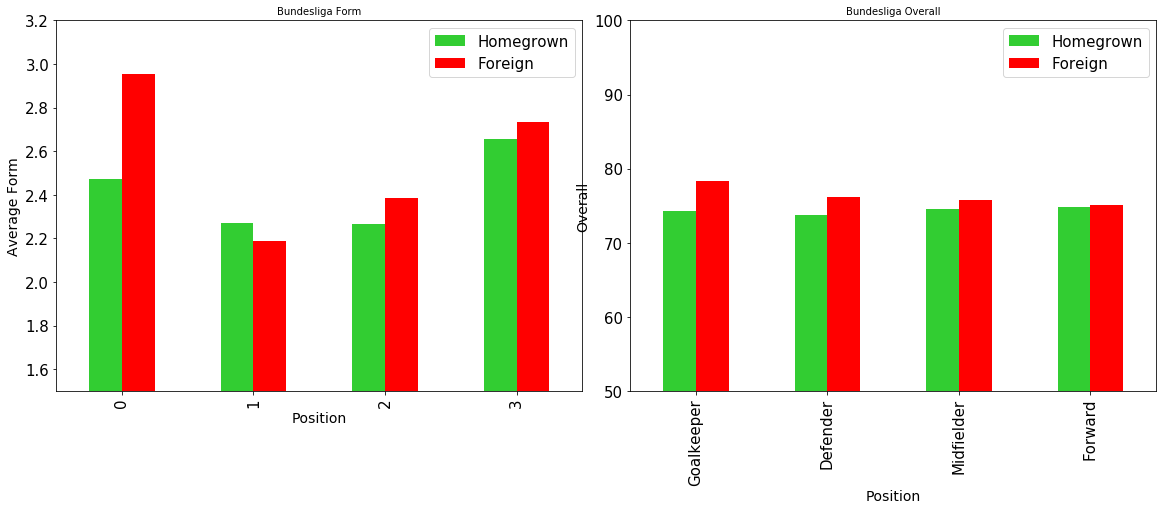

In [26]:
axis_size=14
color = ['limegreen','r']

fig = plt.figure(figsize=(30,15))

gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.2])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)
ax0.set_title('English Premier League Form',size=10)
EPL_positions.plot(ax=ax0,kind='bar',color=color)
ax1 = plt.subplot(gs[0,2:4])
ax1.set_ylim([50,100])
ax1.set_title('English Premier League Overall',size=10)
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
EPL_overall.plot(ax=ax1,kind='bar',color=color)
fig.savefig('../../data/analysis/League H_F1.png')
fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.2])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)
ax0.set_title('La Liga Form',size=10)
LAL_positions.plot(ax=ax0,kind='bar',color=color)
ax1 = plt.subplot(gs[0,2:4])
ax1.set_ylim([50,100])
ax1.set_title('La Liga Overall',size=10)
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
LAL_overall.plot(ax=ax1,kind='bar',color=color)
fig.savefig('../../data/analysis/League H_F2.png')
fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.2])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)
ax0.set_title('Seria A Form',size=10)
SEI_positions.plot(ax=ax0,kind='bar',color=color)
ax1 = plt.subplot(gs[0,2:4])
ax1.set_title('Seria A Overall',size=10)
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
ax1.set_ylim([50,100])
SEI_overall.plot(ax=ax1,kind='bar',color=color)
fig.savefig('../../data/analysis/League H_F3.png')
fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.2])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)
ax0.set_title('Ligue 1 Form',size=10)
L1_positions.plot(ax=ax0,kind='bar',color=color)
ax1 = plt.subplot(gs[0,2:4])
ax1.set_ylim([50,100])
ax1.set_title('Ligue 1 Overall',size=10)
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
L1_overall.plot(ax=ax1,kind='bar',color=color)
fig.savefig('../../data/analysis/League H_F5.png')
fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,0:2])
ax0.set_ylim([1.5,3.2])
ax0.set_ylabel('Average Form',size=axis_size)
ax0.set_xlabel('Position',size=axis_size)
ax0.set_title('Bundesliga Form',size=10)
BUN_positions.plot(ax=ax0,kind='bar',color=color)
ax1 = plt.subplot(gs[0,2:4])
ax1.set_title('Bundesliga Overall',size=10)
ax1.set_ylim([50,100])
ax1.set_ylabel('Overall',size=axis_size)
ax1.set_xlabel('Position',size=axis_size)
BUN_overall.plot(ax=ax1,kind='bar',color=color)

plt.show()
fig.savefig('../../data/analysis/League H_F6.png')

### Whos more likely to Start

In [27]:
EPLH_starts = Homegrown_EPL['Starts/Apps'].mean()
EPLF_starts = Foreign_EPL['Starts/Apps'].mean()

LALH_starts = Homegrown_LAL['Starts/Apps'].mean()
LALF_starts = Foreign_LAL['Starts/Apps'].mean()

BUNH_starts = Homegrown_BUN['Starts/Apps'].mean()
BUNF_starts = Foreign_BUN['Starts/Apps'].mean()

L1H_starts = Homegrown_L1['Starts/Apps'].mean()
L1F_starts = Foreign_L1['Starts/Apps'].mean()

SEIH_starts = Homegrown_SEI['Starts/Apps'].mean()
SEIF_starts = Foreign_SEI['Starts/Apps'].mean()

starts = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
starts.set_value(0,'League',"EPL")
starts.set_value(0,'Homegrown',EPLH_starts)
starts.set_value(0,'Foreign',EPLF_starts)
starts.set_value(1,'League',"LAL")
starts.set_value(1,'Homegrown',LALH_starts )
starts.set_value(1,'Foreign',LALF_starts)
starts.set_value(2,'League',"BUN")
starts.set_value(2,'Homegrown',BUNH_starts)
starts.set_value(2,'Foreign',BUNF_starts)
starts.set_value(3,'League',"L1")
starts.set_value(3,'Homegrown',L1H_starts)
starts.set_value(3,'Foreign',L1F_starts)
starts.set_value(4,'League',"SEI")
starts.set_value(4,'Homegrown',SEIH_starts)
starts.set_value(4,'Foreign',SEIF_starts)
starts

,League,Homegrown,Foreign
0,EPL,0.711031,0.788975
1,LAL,0.715971,0.766175
2,BUN,0.735374,0.737333
3,L1,0.699078,0.725429
4,SEI,0.695266,0.751528


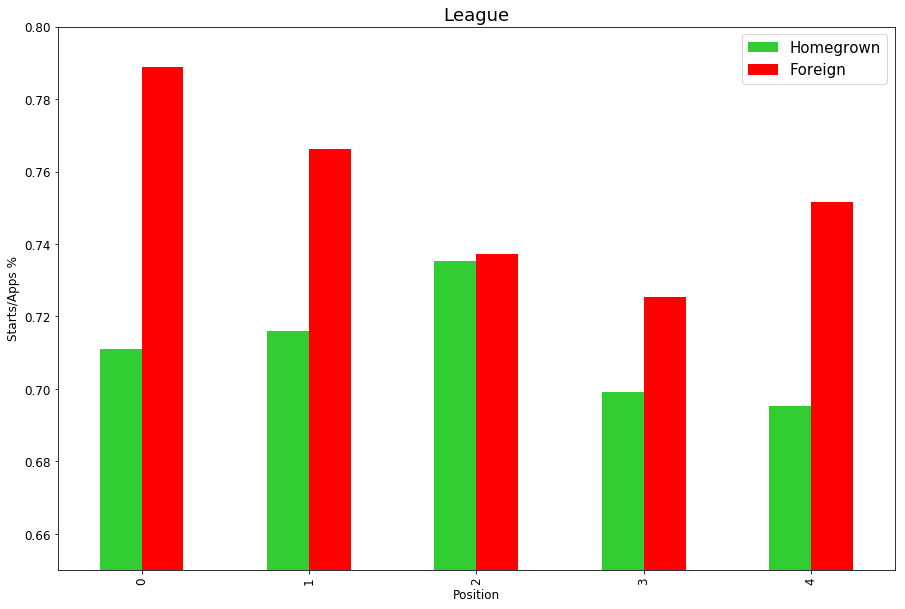

In [28]:
ax = starts[['Homegrown','Foreign']].plot(kind='bar', title ="League", figsize=(15, 10), color= ['limegreen','r'],legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Starts/Apps %", fontsize=12)
ax.set_ylim(0.65,0.8)
plt.show()

### Who's More Likely to be Subbed off 

In [29]:
EPLH_subbed = Homegrown_EPL['Subbed Off/Apps'].mean()
EPLF_subbed = Foreign_EPL['Subbed Off/Apps'].mean()
EPL_subbed = pd.DataFrame([EPLH_subbed,EPLF_subbed])

LALH_subbed = Homegrown_LAL['Subbed Off/Apps'].mean()
LALF_subbed = Foreign_LAL['Subbed Off/Apps'].mean()
LAL_subbed = pd.DataFrame([LALH_subbed,LALF_subbed])

BUNH_subbed = Homegrown_BUN['Subbed Off/Apps'].mean()
BUNF_subbed = Foreign_BUN['Subbed Off/Apps'].mean()
BUN_subbed = pd.DataFrame([BUNH_subbed,BUNF_subbed])

L1H_subbed = Homegrown_L1['Subbed Off/Apps'].mean()
L1F_subbed = Foreign_L1['Subbed Off/Apps'].mean()
L1_subbed = pd.DataFrame([L1H_subbed,L1F_subbed])

SEIH_subbed = Homegrown_SEI['Subbed Off/Apps'].mean()
SEIF_subbed = Foreign_SEI['Subbed Off/Apps'].mean()
SEI_subbed = pd.DataFrame([SEIH_subbed,SEIF_subbed])

subbed = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
subbed.set_value(0,'League',"EPL")
subbed.set_value(0,'Homegrown',EPLH_subbed)
subbed.set_value(0,'Foreign',EPLF_subbed)
subbed.set_value(1,'League',"LAL")
subbed.set_value(1,'Homegrown',LALH_subbed )
subbed.set_value(1,'Foreign',LALF_subbed)
subbed.set_value(2,'League',"BUN")
subbed.set_value(2,'Homegrown',BUNH_subbed)
subbed.set_value(2,'Foreign',BUNF_subbed)
subbed.set_value(3,'League',"L1")
subbed.set_value(3,'Homegrown',L1H_subbed)
subbed.set_value(3,'Foreign',L1F_subbed)
subbed.set_value(4,'League',"SEI")
subbed.set_value(4,'Homegrown',SEIH_subbed)
subbed.set_value(4,'Foreign',SEIF_subbed)

,League,Homegrown,Foreign
0,EPL,0.1685,0.182508
1,LAL,0.184304,0.22032
2,BUN,0.180851,0.213323
3,L1,0.186398,0.174236
4,SEI,0.172065,0.213468


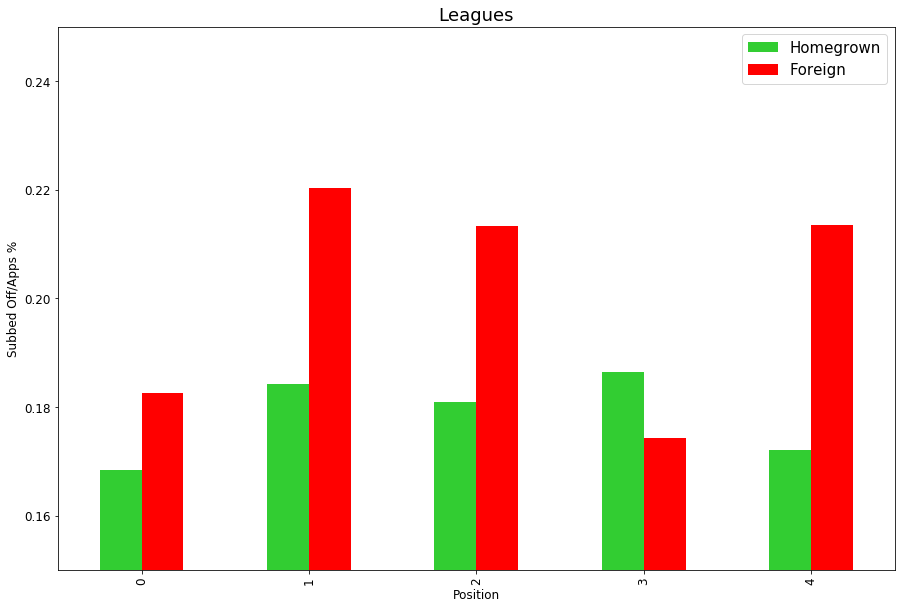

In [30]:
ax = subbed[['Homegrown','Foreign']].plot(kind='bar', title ="Leagues", figsize=(15, 10), legend=True,color= ['limegreen','r'], fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Subbed Off/Apps %", fontsize=12)
ax.set_ylim(0.15,0.25)
plt.show()

### Whos more likely to score all of the goals?

In [31]:
EPLH_goals = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Forward','Goals/Apps'].mean()
EPLF_goals = Foreign_EPL.loc[Foreign_EPL['Position']=='Forward','Goals/Apps'].mean()

BUNH_goals = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Forward','Goals/Apps'].mean()
BUNF_goals = Foreign_BUN.loc[Foreign_BUN['Position']=='Forward','Goals/Apps'].mean()

LALH_goals = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Forward','Goals/Apps'].mean()
LALF_goals = Foreign_LAL.loc[Foreign_LAL['Position']=='Forward','Goals/Apps'].mean()

L1H_goals = Homegrown_L1.loc[Homegrown_L1['Position']=='Forward','Goals/Apps'].mean()
L1F_goals = Foreign_L1.loc[Foreign_L1['Position']=='Forward','Goals/Apps'].mean()

SEIH_goals = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Forward','Goals/Apps'].mean()
SEIF_goals = Foreign_SEI.loc[Foreign_SEI['Position']=='Forward','Goals/Apps'].mean()

goals = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
goals.set_value(0,'League',"EPL")
goals.set_value(0,'Homegrown',EPLH_goals)
goals.set_value(0,'Foreign',EPLF_goals)
goals.set_value(1,'League',"LAL")
goals.set_value(1,'Homegrown',LALH_goals )
goals.set_value(1,'Foreign',LALF_goals)
goals.set_value(2,'League',"BUN")
goals.set_value(2,'Homegrown',BUNH_goals)
goals.set_value(2,'Foreign',BUNF_goals)
goals.set_value(3,'League',"L1")
goals.set_value(3,'Homegrown',L1H_goals)
goals.set_value(3,'Foreign',L1F_goals)
goals.set_value(4,'League',"SEI")
goals.set_value(4,'Homegrown',SEIH_goals)
goals.set_value(4,'Foreign',SEIF_goals)

,League,Homegrown,Foreign
0,EPL,0.240909,0.265736
1,LAL,0.154038,0.282512
2,BUN,0.181261,0.207093
3,L1,0.105024,0.176152
4,SEI,0.159793,0.18205


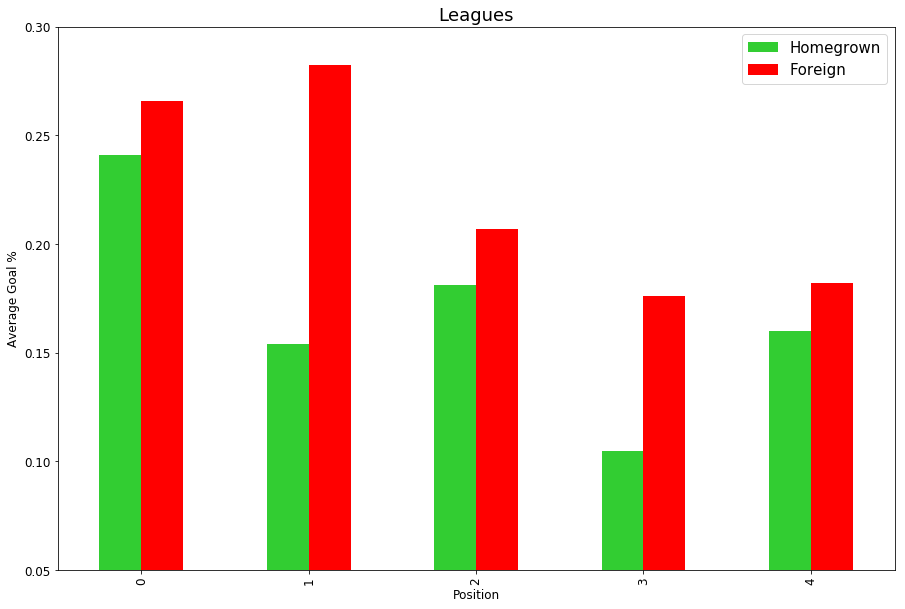

In [32]:
ax = goals[['Homegrown','Foreign']].plot(kind='bar', title ="Leagues", figsize=(15, 10), color= ['limegreen','r'],legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Average Goal %", fontsize=12)
ax.set_ylim(0.05,0.3)
plt.show()

### Whos more likely to assist all of the goals?

In [33]:
EPLH_assists = Homegrown_EPL['Assists/Apps'].mean()
EPLF_assists = Foreign_EPL['Assists/Apps'].mean()
EPL_assists = pd.DataFrame([EPLH_assists,EPLF_assists])

LALH_assists = Homegrown_LAL['Assists/Apps'].mean()
LALF_assists = Foreign_LAL['Assists/Apps'].mean()
LAL_assists = pd.DataFrame([LALH_assists,LALF_assists])

BUNH_assists = Homegrown_BUN['Assists/Apps'].mean()
BUNF_assists = Foreign_BUN['Assists/Apps'].mean()
BUN_assists = pd.DataFrame([BUNH_assists,BUNF_assists])

L1H_assists = Homegrown_L1['Assists/Apps'].mean()
L1F_assists = Foreign_L1['Assists/Apps'].mean()
L1_assists = pd.DataFrame([L1H_assists,L1F_assists])

SEIH_assists = Homegrown_SEI['Assists/Apps'].mean()
SEIF_assists = Foreign_SEI['Assists/Apps'].mean()
SEI_assists = pd.DataFrame([SEIH_assists,SEIF_assists])

assists = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
assists.set_value(0,'League',"EPL")
assists.set_value(0,'Homegrown',EPLH_assists)
assists.set_value(0,'Foreign',EPLF_assists)
assists.set_value(1,'League',"LAL")
assists.set_value(1,'Homegrown',LALH_assists )
assists.set_value(1,'Foreign',LALF_assists)
assists.set_value(2,'League',"BUN")
assists.set_value(2,'Homegrown',BUNH_assists)
assists.set_value(2,'Foreign',BUNF_assists)
assists.set_value(3,'League',"L1")
assists.set_value(3,'Homegrown',L1H_assists)
assists.set_value(3,'Foreign',L1F_assists)
assists.set_value(4,'League',"SEI")
assists.set_value(4,'Homegrown',SEIH_assists)
assists.set_value(4,'Foreign',SEIF_assists)

,League,Homegrown,Foreign
0,EPL,0.05772,0.0668879
1,LAL,0.057233,0.0731645
2,BUN,0.0704317,0.0684561
3,L1,0.0556003,0.0548276
4,SEI,0.0444984,0.0704075


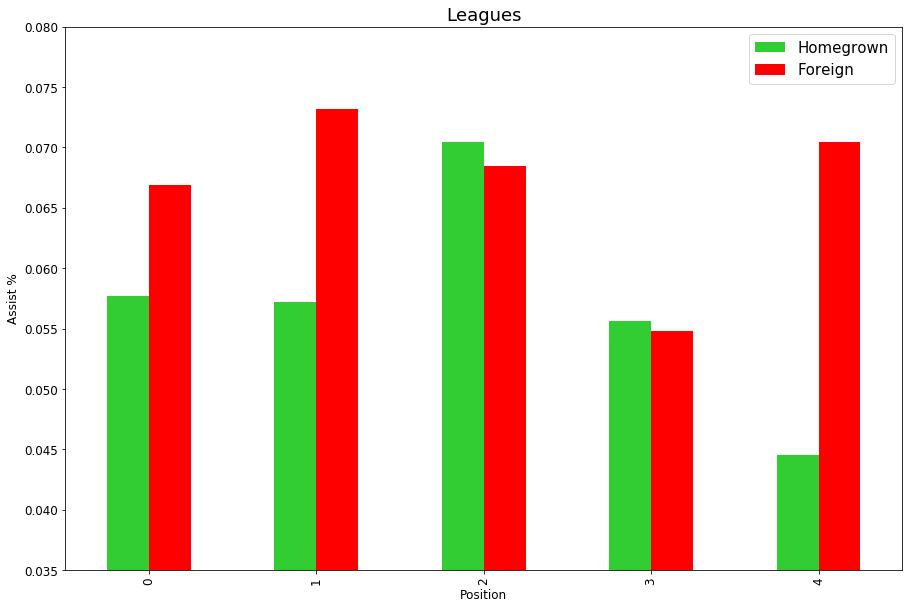

In [34]:
ax = assists[['Homegrown','Foreign']].plot(kind='bar', title ="Leagues", figsize=(15, 10),color= ['limegreen','r'], legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Assist %", fontsize=12)
ax.set_ylim(0.035,0.08)
plt.show()

### Whos more likely to get a clean sheet (Goalkeepers)

In [35]:
EPLH_gkcleansheets = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
EPLF_gkcleansheets = Foreign_EPL.loc[Foreign_EPL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
EPL_gkcleansheets = pd.DataFrame([EPLH_gkcleansheets,EPLF_gkcleansheets])

BUNH_gkcleansheets = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
BUNF_gkcleansheets = Foreign_BUN.loc[Foreign_BUN['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
BUN_gkcleansheets = pd.DataFrame([BUNH_gkcleansheets,BUNF_gkcleansheets])

LALH_gkcleansheets = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
LALF_gkcleansheets = Foreign_LAL.loc[Foreign_LAL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
LAL_gkcleansheets = pd.DataFrame([LALH_gkcleansheets,LALF_gkcleansheets])

L1H_gkcleansheets = Homegrown_L1.loc[Homegrown_L1['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
L1F_gkcleansheets = Foreign_L1.loc[Foreign_L1['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
L1_gkcleansheets = pd.DataFrame([L1H_gkcleansheets,L1F_gkcleansheets])

SEIH_gkcleansheets = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
SEIF_gkcleansheets = Foreign_SEI.loc[Foreign_SEI['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
SEI_gkcleansheets = pd.DataFrame([SEIH_gkcleansheets,SEIF_gkcleansheets])

gkcleansheets = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
gkcleansheets.set_value(0,'League',"EPL")
gkcleansheets.set_value(0,'Homegrown',EPLH_gkcleansheets)
gkcleansheets.set_value(0,'Foreign',EPLF_gkcleansheets)
gkcleansheets.set_value(1,'League',"LAL")
gkcleansheets.set_value(1,'Homegrown',LALH_gkcleansheets )
gkcleansheets.set_value(1,'Foreign',LALF_gkcleansheets)
gkcleansheets.set_value(2,'League',"BUN")
gkcleansheets.set_value(2,'Homegrown',BUNH_gkcleansheets)
gkcleansheets.set_value(2,'Foreign',BUNF_gkcleansheets)
gkcleansheets.set_value(3,'League',"L1")
gkcleansheets.set_value(3,'Homegrown',L1H_gkcleansheets)
gkcleansheets.set_value(3,'Foreign',L1F_gkcleansheets)
gkcleansheets.set_value(4,'League',"SEI")
gkcleansheets.set_value(4,'Homegrown',SEIH_gkcleansheets)
gkcleansheets.set_value(4,'Foreign',SEIF_gkcleansheets)

,League,Homegrown,Foreign
0,EPL,0.257793,0.276225
1,LAL,0.280871,0.306518
2,BUN,0.28933,0.368711
3,L1,0.279229,0.231765
4,SEI,0.239935,0.284952


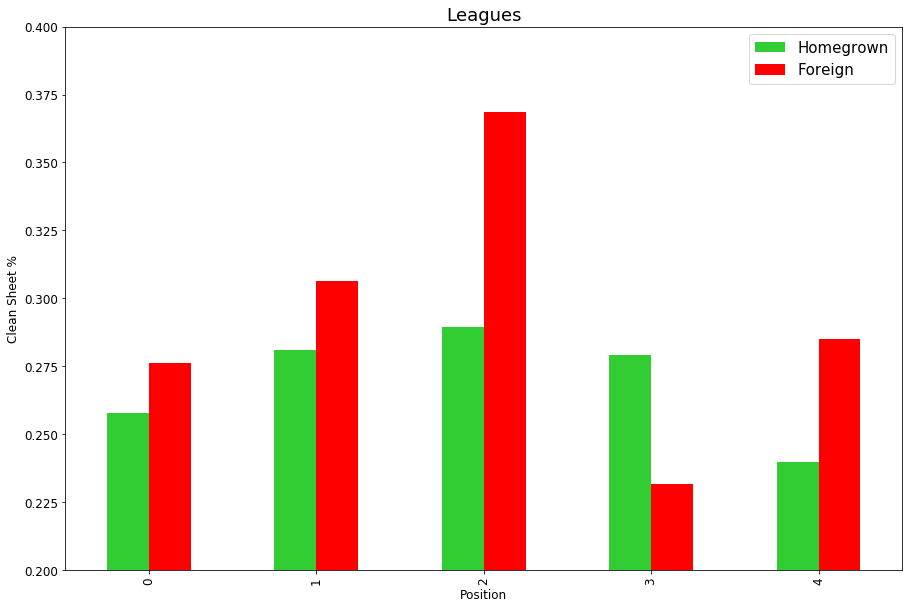

In [36]:
ax = gkcleansheets[['Homegrown','Foreign']].plot(kind='bar', title ="Leagues", color= ['limegreen','r'],figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Clean Sheet %", fontsize=12)
ax.set_ylim(0.2,0.40)
plt.show()

## So who preforms the best vs Who is better rated?

In [37]:
EPLH_form = Homegrown_EPL['Average Form'].mean()
EPLF_form = Foreign_EPL['Average Form'].mean()
EPL_form = pd.DataFrame([EPLH_form,EPLF_form])

LALH_form = Homegrown_LAL['Average Form'].mean()
LALF_form = Foreign_LAL['Average Form'].mean()
LAL_form = pd.DataFrame([LALH_form,LALF_form])

BUNH_form = Homegrown_BUN['Average Form'].mean()
BUNF_form = Foreign_BUN['Average Form'].mean()
BUN_form = pd.DataFrame([BUNH_form,BUNF_form])

L1H_form = Homegrown_L1['Average Form'].mean()
L1F_form = Foreign_L1['Average Form'].mean()
L1_form = pd.DataFrame([L1H_form,L1F_form])

SEIH_form = Homegrown_SEI['Average Form'].mean()
SEIF_form = Foreign_SEI['Average Form'].mean()
SEI_form = pd.DataFrame([SEIH_form,SEIF_form])


form = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
form.set_value(0,'League',"EPL")
form.set_value(0,'Homegrown',EPLH_form)
form.set_value(0,'Foreign',EPLF_form)
form.set_value(1,'League',"LAL")
form.set_value(1,'Homegrown',LALH_form )
form.set_value(1,'Foreign',LALF_form)
form.set_value(2,'League',"BUN")
form.set_value(2,'Homegrown',BUNH_form)
form.set_value(2,'Foreign',BUNF_form)
form.set_value(3,'League',"L1")
form.set_value(3,'Homegrown',L1H_form)
form.set_value(3,'Foreign',L1F_form)
form.set_value(4,'League',"SEI")
form.set_value(4,'Homegrown',SEIH_form)
form.set_value(4,'Foreign',SEIF_form)

,League,Homegrown,Foreign
0,EPL,2.34213,2.55185
1,LAL,2.13044,2.58726
2,BUN,2.35381,2.44611
3,L1,2.22368,2.39744
4,SEI,2.14425,2.34604


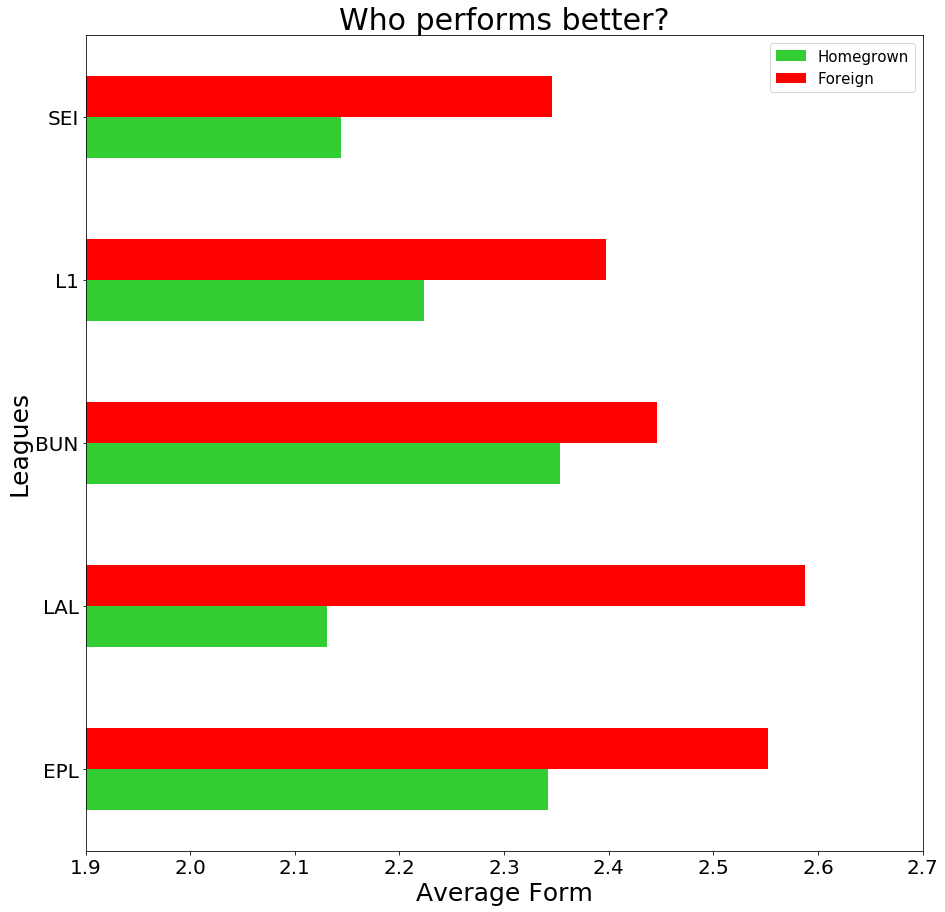

In [38]:
ax = form[['Homegrown','Foreign']].plot(kind='barh',figsize=(15, 15),color= ['limegreen','r'], legend=True, fontsize=20)
ax.set_ylabel("Leagues", fontsize=25)
ax.set_xlabel("Average Form", fontsize=25)
ax.set_title("Who performs better?",fontsize= 30)
ax.set_xlim(1.9,2.7)
ax.set_yticklabels(['EPL','LAL','BUN','L1','SEI'])
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':15})
plt.show()
plt.savefig('../../data/analysis/League Form.png')

In [39]:
EPLH_overall = Homegrown_EPL['overall'].mean()
EPLF_overall = Foreign_EPL['overall'].mean()
EPL_overall = pd.DataFrame([EPLH_overall,EPLF_overall])

LALH_overall = Homegrown_LAL['overall'].mean()
LALF_overall = Foreign_LAL['overall'].mean()
LAL_overall = pd.DataFrame([LALH_overall,LALF_overall])

BUNH_overall = Homegrown_BUN['overall'].mean()
BUNF_overall = Foreign_BUN['overall'].mean()
BUN_overall = pd.DataFrame([BUNH_overall,BUNF_overall])

L1H_overall = Homegrown_L1['overall'].mean()
L1F_overall = Foreign_L1['overall'].mean()
L1_overall = pd.DataFrame([L1H_overall,L1F_overall])

SEIH_overall = Homegrown_SEI['overall'].mean()
SEIF_overall = Foreign_SEI['overall'].mean()
SEI_overall = pd.DataFrame([SEIH_overall,SEIF_overall])

overall = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
overall.set_value(0,'League',"EPL")
overall.set_value(0,'Homegrown',EPLH_overall)
overall.set_value(0,'Foreign',EPLF_overall)
overall.set_value(1,'League',"LAL")
overall.set_value(1,'Homegrown',LALH_overall )
overall.set_value(1,'Foreign',LALF_overall)
overall.set_value(2,'League',"BUN")
overall.set_value(2,'Homegrown',BUNH_overall)
overall.set_value(2,'Foreign',BUNF_overall)
overall.set_value(3,'League',"L1")
overall.set_value(3,'Homegrown',L1H_overall)
overall.set_value(3,'Foreign',L1F_overall)
overall.set_value(4,'League',"SEI")
overall.set_value(4,'Homegrown',SEIH_overall)
overall.set_value(4,'Foreign',SEIF_overall)

,League,Homegrown,Foreign
0,EPL,74.4333,77.5269
1,LAL,75.2395,78.1899
2,BUN,74.3069,75.8674
3,L1,72.1373,73.892
4,SEI,73.2704,75.9369


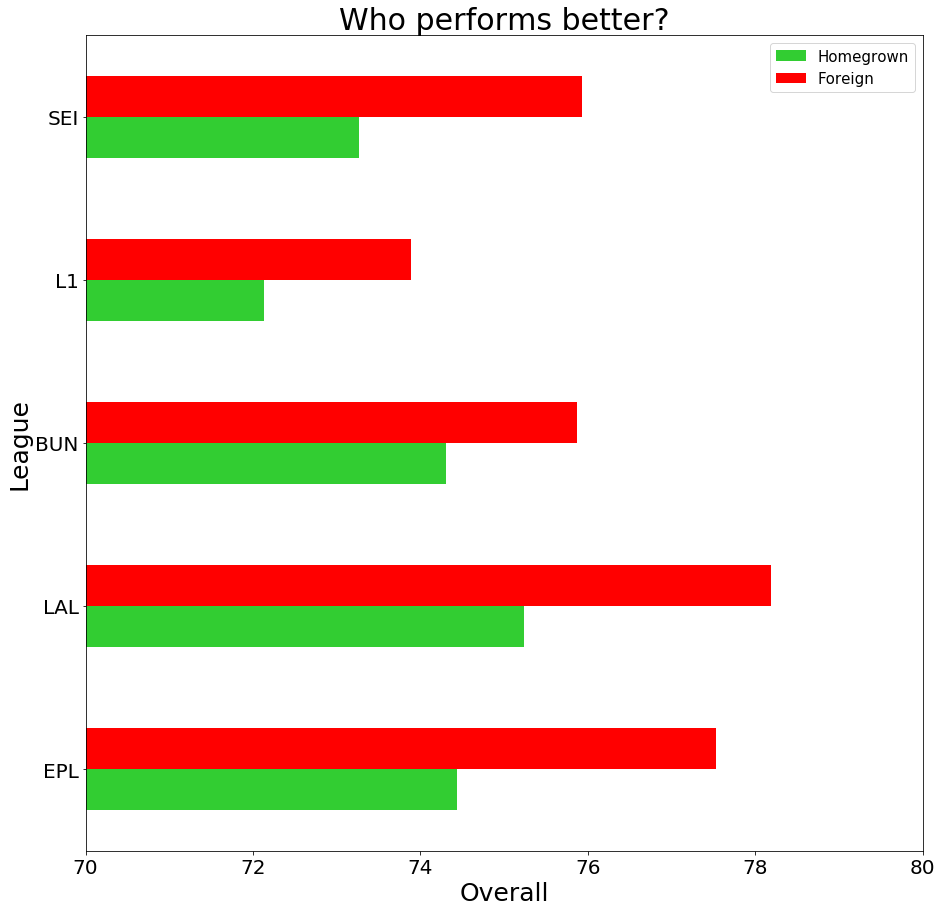

In [40]:
ax = overall[['Homegrown','Foreign']].plot(kind='barh', figsize=(15, 15),color= ['limegreen','r'], legend=True, fontsize=20)
ax.set_ylabel("League", fontsize=25)
ax.set_title("Who performs better?",fontsize= 30)
ax.set_xlabel("Overall", fontsize=25)
ax.set_yticklabels(['EPL','LAL','BUN','L1','SEI'])
ax.set_xlim(70,80)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':15})
plt.show()

$pip install folium

adding in a heat map not complete yet

In [41]:
RQ2

,Players,Position,league,age,nationality,overall,Homegrown,Abroad,Starts/Apps,Subbed Off/Apps,Overall Apps,Average Form,Goals/Apps,Assists/Apps,Clean Sheets/Apps
1,Lionel Messi,Forward,Spanish Primera Division,30.0,Argentina,93.0,False,False,0.934524,0.059524,168.0,8.255952,1.065476,0.386905,0.000000
2,Cristiano Ronaldo,Forward,Spanish Primera Division,32.0,Portugal,94.0,False,False,0.975610,0.109756,164.0,7.926829,1.054878,0.317073,0.000000
3,Luis Suarez,Forward,Spanish Primera Division,30.0,Uruguay,92.0,False,False,0.975758,0.151515,165.0,7.018182,0.836364,0.363636,0.000000
4,Denis Bouanga,Midfielder,French Ligue 2,22.0,Gabon,71.0,False,False,1.000000,1.000000,1.0,7.000000,1.000000,0.000000,0.000000
5,Josh Harrop,Midfielder,English Championship,21.0,England,65.0,False,False,1.000000,0.000000,1.0,7.000000,1.000000,0.000000,0.000000
6,Dylan Saint-Louis,Midfielder,French Ligue 2,22.0,France,68.0,False,False,1.000000,1.000000,1.0,7.000000,1.000000,0.000000,0.000000
7,Luca Crosta,Goalkeeper,Italian Serie A,19.0,Italy,64.0,True,False,1.000000,0.000000,1.0,7.000000,0.000000,0.000000,0.000000
8,Zlatan Ibrahimovic,Forward,English Premier League,35.0,Sweden,88.0,False,False,0.960000,0.093333,150.0,6.900000,0.866667,0.286667,0.000000
9,Gabriel Jesus,Forward,English Premier League,20.0,Brazil,81.0,False,False,0.800000,0.300000,10.0,6.300000,0.700000,0.400000,0.000000
10,Robert Lewandowski,Forward,German Bundesliga,28.0,Poland,91.0,False,False,0.925000,0.150000,160.0,6.050000,0.756250,0.150000,0.000000


In [42]:
RQ2HeatMap = RQ2.groupby(['nationality']).count()[['Players','league']]
RQ2HeatMap = RQ2HeatMap.drop('league',1)
RQ2HeatMap = RQ2HeatMap.reset_index()

In [43]:
# Import libraries
import pandas as pd
import folium

# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
world_geo = os.path.join("../../data/raw/",'world.json')


# Initialize the map:
m = folium.Map(location=[0, 0], zoom_start=0)

# Add the color for the chloropleth:
m.choropleth(
 geo_data=world_geo,
 name='choropleth',
 data=RQ2HeatMap,
 columns=['nationality', 'Players'],
 key_on='feature.name',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.3,
 legend_name='Player Count(%)'
)
folium.LayerControl().add_to(m)

m